In [1]:
%matplotlib inline
import pylhe
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [14, 3]

# LHE File for "p p > H  j, H > S S - MS= 55Gev"
lhe_MS55 = pylhe.readLHE("Events/run_hss_MS55/unweighted_events.lhe")

# LHE File for "p p > S S j - MS= 72Gev"
lhe_MS72= pylhe.readLHE("Events/run_ppSSj_MS72/unweighted_events.lhe")

# LHE File for "p p > S S j - MS= 90Gev"
lhe_MS90 = pylhe.readLHE("Events/run_ppSSj_MS90/unweighted_events.lhe")

def momenta(particles):
    total_momentum = 0
    p = [0, 0, 0]
    for ptc in particles:
        p[0] += ptc.px
        p[1] += ptc.py
        p[2] += ptc.pz
    total_momentum = np.sqrt(p[0]**2 + p[1]**2 + p[2]**2)
    return total_momentum

jet_ids = [1, 2, 3, 4, 5, 6, 21]

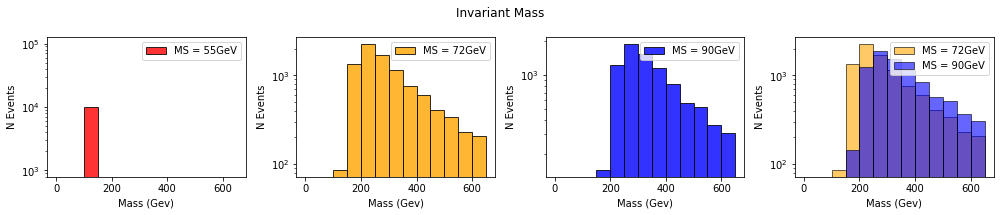

In [2]:
# Dark matter invariant mass 
ms55_invariant_mass = []
for event in lhe_MS55:
    matter = []
    e_total = [] 
    for ptc in event.particles:
        if ptc.id == 9000005:
            matter.append(ptc)
            e_total.append(ptc.e)
    # if event.particles[-1].id in jet_ids:
    #         j = event.particles[-1]
    #         matter.append(j)
    #         e_total.append(j.e)    
    ms55_invariant_mass.append(np.sqrt(sum(e_total)**2 - momenta(matter)**2))

ms72_invariant_mass = []
for event in lhe_MS72:
    matter = []
    e_total = []
    for ptc in event.particles:
        if ptc.id == 9000005:
            matter.append(ptc)
            e_total.append(ptc.e)
    if event.particles[-1].id in jet_ids:
            j = event.particles[-1]
            matter.append(j)
            e_total.append(j.e)    
    ms72_invariant_mass.append(np.sqrt(sum(e_total)**2 - momenta(matter)**2))

ms90_invariant_mass = []
for event in lhe_MS90:
    matter = []
    e_total = []
    for ptc in event.particles:
        if ptc.id == 9000005:
            matter.append(ptc)
            e_total.append(ptc.e)
    if event.particles[-1].id in jet_ids:
            j = event.particles[-1]
            matter.append(j)
            e_total.append(j.e)
    ms90_invariant_mass.append(np.sqrt(sum(e_total)**2 - momenta(matter)**2))

bins = np.arange(0, 700, 50)

fig, ((ax1, ax2, ax3, ax4)) = plt.subplots(1, 4)


# histogram for "p p > H  j, H > S S - MS= 55Gev"
ax1.hist(ms55_invariant_mass, bins = bins, alpha=0.8, color='red', label='MS = 55GeV', log=True, edgecolor='black')
ax1.set(xlabel='Mass (Gev)', ylabel='N Events')
ax1.legend()

# histogram for "p p > S S - MS= 72Gev"
ax2.hist(ms72_invariant_mass, bins = bins, alpha=0.8, color='orange', label='MS = 72GeV', log=True, edgecolor='black')
ax2.set(xlabel='Mass (Gev)', ylabel='N Events')
ax2.legend()

# histogram for "p p > S S - MS= 90Gev"
ax3.hist(ms90_invariant_mass, bins = bins, alpha=0.8, color='blue', label='MS = 90GeV', log=True, edgecolor='black')
ax3.set(xlabel='Mass (Gev)', ylabel='N Events')
ax3.legend()

# histogram for "MS= 55GeV, MS= 72Gev and MS= 90Gev"
ax4.hist(ms72_invariant_mass, bins = bins, alpha=0.6, color='orange', label='MS = 72GeV', log=True, edgecolor='black')
ax4.hist(ms90_invariant_mass, bins = bins, alpha=0.6, color='blue', label='MS = 90GeV', log=True, edgecolor='black')
ax4.set(xlabel='Mass (Gev)', ylabel='N Events')
ax4.legend()


fig.suptitle('Invariant Mass')
fig.tight_layout()
plt.show()

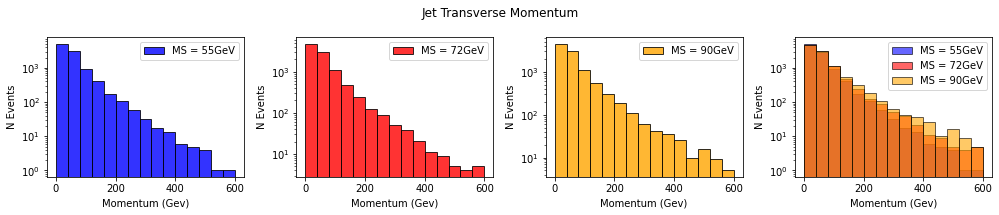

In [10]:
# Jet transverse momentum for each mass value

ms55_transverse_momentum = []
for event in lhe_MS55:
    if event.particles[-1].id in jet_ids:
        j = event.particles[-1]
    pt = np.sqrt(j.px**2 + j.py**2)-
    ms55_transverse_momentum.append(pt)

ms72_transverse_momentum = []
for event in lhe_MS72:
    if event.particles[-1].id in jet_ids:
        j = event.particles[-1]
    pt = np.sqrt(j.px**2 + j.py**2)
    ms72_transverse_momentum.append(pt)

ms90_transverse_momentum = []
for event in lhe_MS90:
    if event.particles[-1].id in jet_ids:
        j = event.particles[-1]
    pt = np.sqrt(j.px**2 + j.py**2)
    ms90_transverse_momentum.append(pt)

fig, ((ax1, ax2, ax3, ax4)) = plt.subplots(1, 4)
bins = range(0, 601, 40)

# histogram for "p p > H  j, H > S S - MS= 55Gev"
ax1.hist(ms55_transverse_momentum, bins = bins, alpha=0.8, color='blue', label='MS = 55GeV', log=True, edgecolor='black')
ax1.set(xlabel='Momentum (Gev)', ylabel='N Events')
ax1.legend()

# histogram for "p p > H  j, H > S S - MS= 72Gev"
ax2.hist(ms72_transverse_momentum, bins = bins, alpha=0.8, color='red', label='MS = 72GeV', log=True, edgecolor='black')
ax2.set(xlabel='Momentum (Gev)', ylabel='N Events')
ax2.legend()

# histogram for "p p > H  j, H > S S - MS= 90Gev"
ax3.hist(ms90_transverse_momentum, bins = bins, alpha=0.8, color='orange', label='MS = 90GeV', log=True, edgecolor='black')
ax3.set(xlabel='Momentum (Gev)', ylabel='N Events')
ax3.legend()

# histogram for "MS= 55Gev, MS= 72Gev and MS= 90Gev"
ax4.hist(ms55_transverse_momentum, bins = bins, alpha=0.6, color='blue', label='MS = 55GeV', log=True, edgecolor='black')
ax4.hist(ms72_transverse_momentum, bins = bins, alpha=0.6, color='red', label='MS = 72GeV', log=True, edgecolor='black')
ax4.hist(ms90_transverse_momentum, bins = bins, alpha=0.6, color='orange', label='MS = 90GeV', log=True, edgecolor='black')
ax4.set(xlabel='Momentum (Gev)', ylabel='N Events')
ax4.legend()

fig.suptitle('Jet Transverse Momentum')
fig.tight_layout()
plt.show()